In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import astropy.units as u
import numpy as np
from exo_finder.data_pipeline.generation.dataset_generation import TransitProfile
from exo_finder.data_pipeline.generation.time_generation import generate_time_days_of_length
from exo_finder.data_pipeline.generation.transit_generation import PlanetType, PeriodFrequency,generate_transits_from_params, generate_transit_parameters
from exo_finder.default_datasets import gaia_dataset

In [2]:
fields = ["gaia_id", "radius", "mass_flame", "teff_mean"]
gaia_df = gaia_dataset.load_gaia_parameters_dataset().to_pandas()[fields].dropna()
print("Dataset size:", len(gaia_df))

Dataset size: 236728


In [3]:
%load_ext autoreload
%autoreload 2

Star 6788060403897224064: Radius 0.7109879553318024, Mass 0.7190612554550171, Teff 4486.28857421875


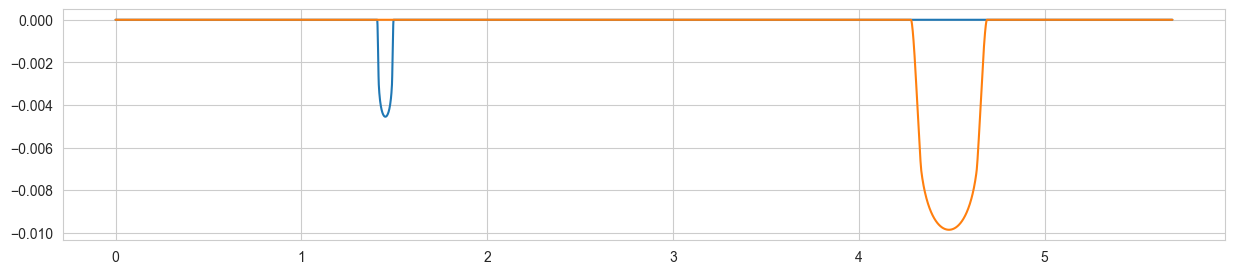

In [4]:
sample = gaia_df.sample(1)
radius, mass, teff = sample["radius"].item(), sample["mass_flame"].item(), sample["teff_mean"].item()
print(f"Star {sample['gaia_id'].item()}: Radius {radius}, Mass {mass}, Teff {teff}")
mass = mass * u.solMass
radius = radius * u.solRad
teff = teff * u.K

params_e = generate_transit_parameters(
    planet_type=PlanetType.MINI_NEPTUNE,
    orbital_period_interval=PeriodFrequency.THREE_TO_TEN_DAYS,
    star_radius=radius,
    star_mass= mass,
    transit_midpoint_range=(1, 2),
)

params_j = generate_transit_parameters(
    planet_type=PlanetType.JUPITER,
    orbital_period_interval=(1000, 1000),
    star_radius=radius,
    star_mass= mass,
    transit_midpoint_range=(0, 5),
)

x = generate_time_days_of_length(2**12)
transits_e = generate_transits_from_params(params_e, x)
transits_j = generate_transits_from_params(params_j, x)

plt.figure(figsize=(15, 3))
plt.plot(x, transits_e)
plt.plot(x, transits_j)
plt.show()

### Generate dataset and study the distribution of parameters

In [5]:
# Hot Jupyters: short period, at least 2 transits
hot_jupyters = TransitProfile(
    planet_type=PlanetType.JUPITER,
    transit_period_range=(1, 10),
    transit_midpoint_range=(0, 5),
    weight=1,
)
hot_jupyters = TransitProfile(
    planet_type=PlanetType.JUPITER,
    transit_period_range=(1, 10),
    transit_midpoint_range=(0, 5),
    weight=1,
)
n = 1000

rndgen = np.random.default_rng(8)
sample_stars = gaia_df.sample(n, replace=True, random_state=8)

all_params = []
for i, row in sample_stars.iterrows():
    for planet_type in PlanetType:
        all_params.append(generate_transit_parameters(
            planet_type=planet_type,
            orbital_period_interval=(0.5, 10),
            transit_midpoint_range=(0, 5),
            star_radius=row["radius"] * u.solRad,
            star_mass=row["mass_flame"] * u.solMass,
            rnd_generator=rndgen
        ))

all_transits = [generate_transits_from_params(p, x) for p in all_params]
all_transits = np.vstack(all_transits)

params_df = pd.DataFrame([p.to_dict() for p in all_params])
params_df

,period_d,transit_midpoint_d,planet_radius_solrad,star_radius_solrad,semi_major_axis_solrad,planet_mass_solmass,inclination_deg,eccentricity,argument_of_periastron_deg,limb_darkening_c1,limb_darkening_c2,first_transit_midpoint_d,planet_to_star_radius,semimajor_axis_to_star_radius
0,3.527753,4.349483,0.007916,1.070165,12.321388,0.000002,87.824842,0.008434,140.790530,0.587438,0.141221,0.821730,0.007397,11.513538
1,5.050172,1.206761,0.015444,1.070165,15.650695,0.000016,89.141351,0.169375,92.572289,0.587438,0.141221,1.206761,0.014431,14.624559
2,4.518350,2.954514,0.027363,1.070165,14.531691,0.000016,87.610258,0.297074,217.538027,0.587438,0.141221,2.954514,0.025569,13.578922
3,4.028178,1.423103,0.062550,1.070165,13.461725,0.000239,89.163795,0.217906,6.041539,0.587438,0.141221,1.423103,0.058449,12.579108
4,6.358915,3.036653,0.085885,1.070165,18.253132,0.000614,89.550958,0.079064,80.301595,0.587438,0.141221,3.036653,0.080254,17.056368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,7.864615,1.947035,0.015615,0.735103,19.544895,0.000013,88.530390,0.132413,241.267505,0.521562,0.201457,1.947035,0.021242,26.587963
5996,8.121312,3.108165,0.035590,0.735103,19.968039,0.000029,88.947620,0.224893,240.956216,0.521562,0.201457,3.108165,0.048415,27.163588
5997,8.687711,0.317856,0.060595,0.735103,20.887855,0.000247,89.917420,0.380238,178.546828,0.521562,0.201457,0.317856,0.082431,28.414862
5998,4.085951,0.454095,0.105985,0.735103,12.636340,0.001006,88.680092,0.171206,147.279363,0.521562,0.201457,0.454095,0.144177,17.189886


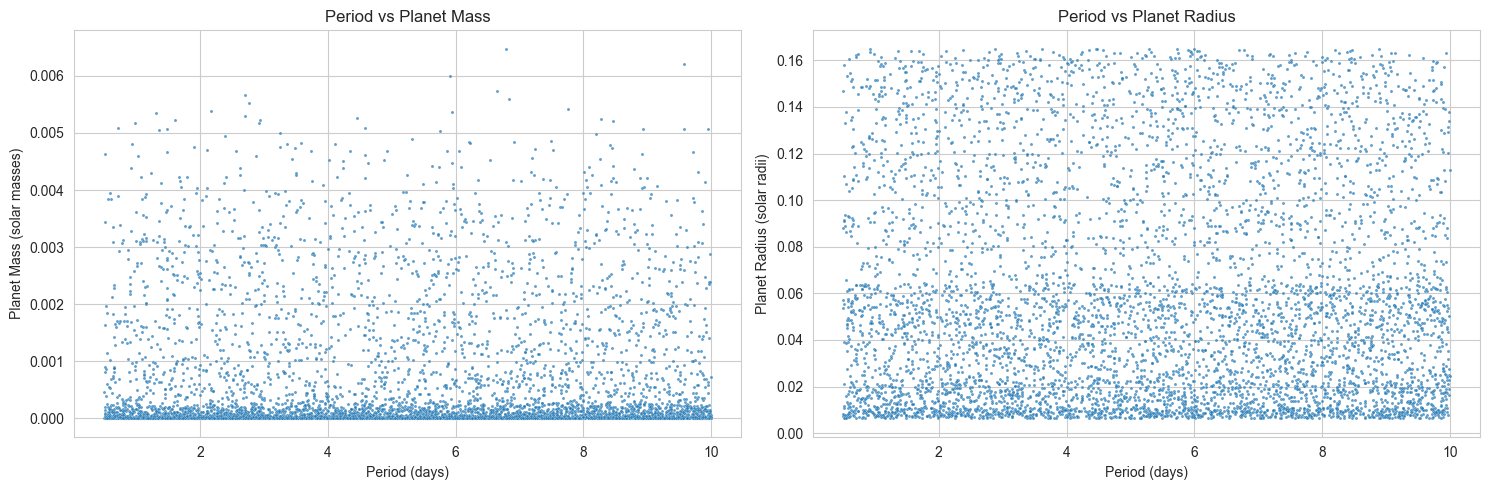

In [6]:
import seaborn as sns
period_mass = params_df[["period_d", "planet_mass_solmass"]].to_numpy()
period_radius = params_df[["period_d", "planet_radius_solrad"]].to_numpy()

# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot period vs mass in the first subplot
sns.scatterplot(x="period_d", y="planet_mass_solmass", data=params_df, s=5, alpha=0.7, ax=ax1)
ax1.set_title('Period vs Planet Mass')
ax1.set_xlabel('Period (days)')
ax1.set_ylabel('Planet Mass (solar masses)')

# Plot period vs radius in the second subplot
sns.scatterplot(x="period_d", y="planet_radius_solrad", data=params_df, s=5, alpha=0.7, ax=ax2)
ax2.set_title('Period vs Planet Radius')
ax2.set_xlabel('Period (days)')
ax2.set_ylabel('Planet Radius (solar radii)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Periods stats: Min: 0.5011437690602996, max: 9.998370038778384, median: 5.396617581189394, 90% interval: [0.99740579 9.54705858]


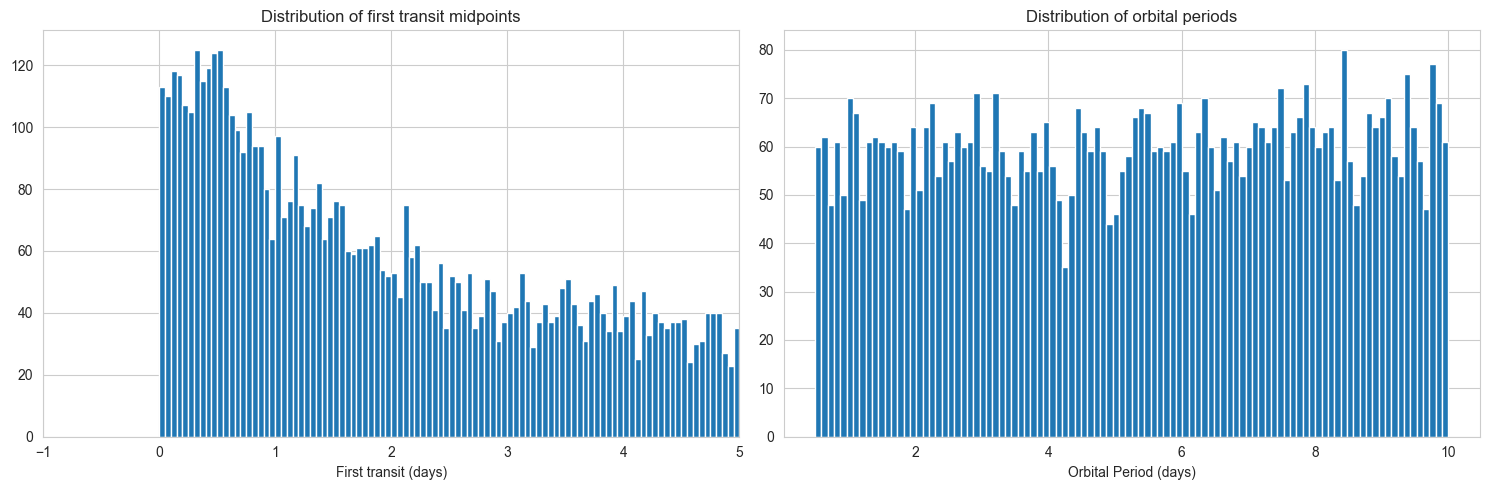

In [10]:
periods = params_df["period_d"].to_numpy()
midpoints = params_df["first_transit_midpoint_d"].to_numpy()
print(f"Periods stats: Min: {min(periods)}, max: {max(periods)}, median: {np.median(periods)}, 90% interval: {np.quantile(periods, q=(0.05, 0.95))}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(midpoints, bins=100)
ax2.hist(periods[periods < 50], bins=100)
ax1.set(title="Distribution of first transit midpoints", xlabel="First transit (days)", xlim=(-1, 5))
ax2.set(title="Distribution of orbital periods", xlabel="Orbital Period (days)")
plt.tight_layout()
plt.show()